In [1]:
import pandas as pd 
df = pd.read_csv('job_dataset.csv')

df.info()
df.describe(include='all')


df.isnull().sum()


df.columns.to_list()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1583 entries, 0 to 1582
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_title     1583 non-null   object
 1   company       1583 non-null   object
 2   job_location  1583 non-null   object
 3   job_summary   1583 non-null   object
 4   post_date     1583 non-null   object
 5   today         1583 non-null   object
 6   job_salary    405 non-null    object
 7   job_url       1583 non-null   object
dtypes: object(8)
memory usage: 99.1+ KB


['job_title',
 'company',
 'job_location',
 'job_summary',
 'post_date',
 'today',
 'job_salary',
 'job_url']

C:\Users\saumi\AppData\Local\Temp\ipykernel_8684\749152560.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_title.values, y=top_title.index, palette='mako')


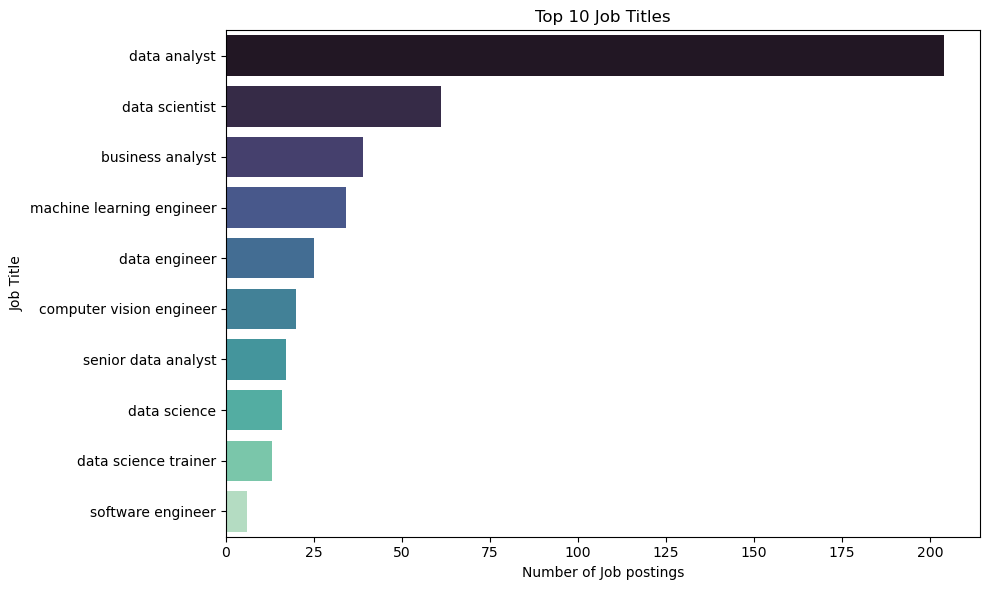

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

df['job_title'] = df['job_title'].str.lower()

top_title = df['job_title'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_title.values, y=top_title.index, palette='mako')
plt.title('Top 10 Job Titles')
plt.xlabel('Number of Job postings')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()

C:\Users\saumi\AppData\Local\Temp\ipykernel_8684\2795225371.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_location.values,y=top_location.index,palette='viridis')


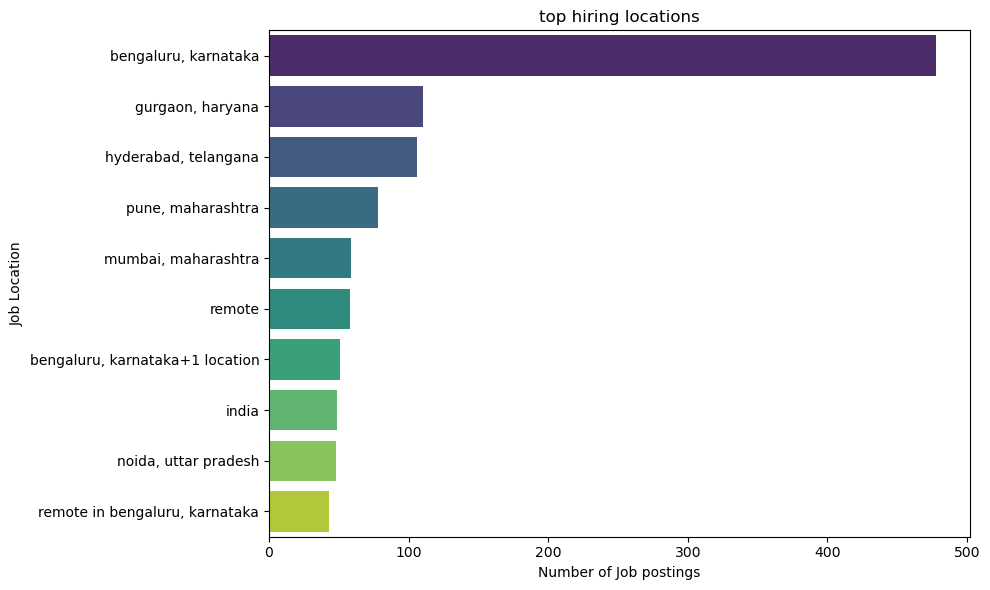

In [3]:
df['job_location'] = df['job_location'].str.lower()

top_location = df['job_location'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_location.values,y=top_location.index,palette='viridis')
plt.title('top hiring locations')
plt.xlabel('Number of Job postings')
plt.ylabel('Job Location')
plt.tight_layout()
plt.show()


C:\Users\saumi\AppData\Local\Temp\ipykernel_8684\849402127.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies.values, y=top_companies.index, palette='cubehelix')


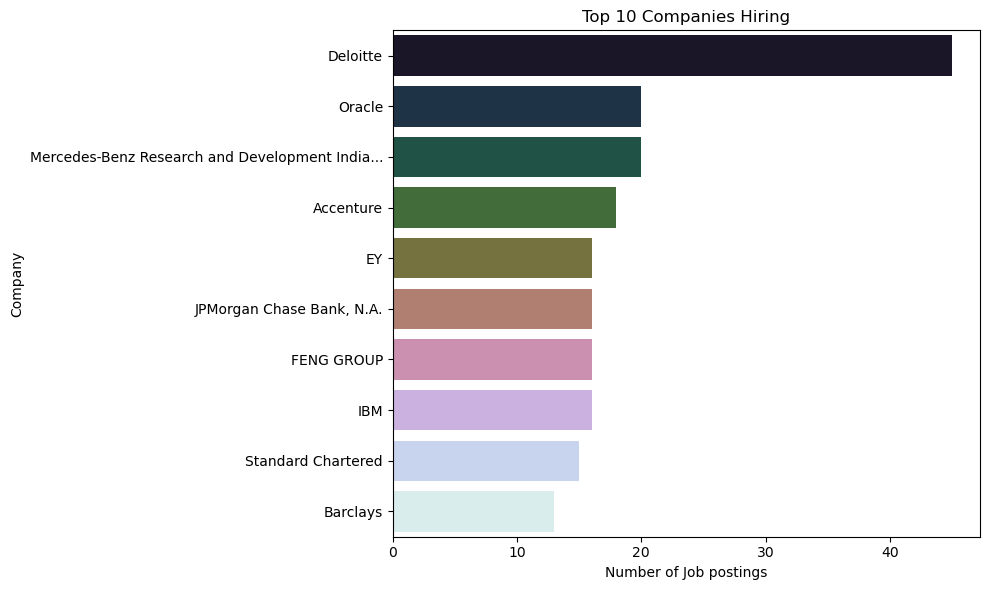

In [4]:
df['company'] = df['company']

top_companies = df['company'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_companies.values, y=top_companies.index, palette='cubehelix')
plt.title('Top 10 Companies Hiring')
plt.xlabel('Number of Job postings')
plt.ylabel('Company')
plt.tight_layout()
plt.show()

In [5]:
df['today'] = pd.to_datetime(df['today'],errors='coerce')



import numpy as np
import re

def extract_days(text):
    if pd.isna(text):
        return np.nan
    text = text.lower()
    if '30+' in text:
        return 30
    elif 'PostedJust posted' in text:
        return 0
    else:
        match = re.search(r'(\d+)\s+day', text)
        if match:
            return int(match.group(1))
        return np.nan
    
df['days_ago'] = df['post_date'].apply(extract_days)


df['days_ago']


df[['post_date', 'days_ago', 'today']].head(10)


df['days_ago'].apply(type).value_counts()


df['today'] = pd.to_datetime(df['today'], errors='coerce')
df['today'].dtype


df['post_date_clean'] = df['today'] - pd.to_timedelta(df['days_ago'], unit='d')



df[['post_date', 'days_ago', 'today', 'post_date_clean']].head(10)


,post_date,days_ago,today,post_date_clean
0,PostedPosted 30+ days ago,30.0,2022-07-26,2022-06-26
1,PostedPosted 30+ days ago,30.0,2022-07-26,2022-06-26
2,PostedPosted 3 days ago,3.0,2022-07-26,2022-07-23
3,PostedPosted 30+ days ago,30.0,2022-07-26,2022-06-26
4,PostedPosted 30+ days ago,30.0,2022-07-26,2022-06-26
5,EmployerActive 5 days ago,5.0,2022-07-26,2022-07-21
6,PostedPosted 14 days ago,14.0,2022-07-26,2022-07-12
7,PostedPosted 3 days ago,3.0,2022-07-26,2022-07-23
8,PostedJust posted,NaN,2022-07-26,NaT
9,PostedPosted 1 day ago,1.0,2022-07-26,2022-07-25


In [6]:
df['post_date'] = df['post_date'].str.replace(r'PostedPosted', 'Posted', regex=True)
df['post_date'] = df['post_date'].str.replace(r'PostedJust posted', 'Just posted', regex=True)
df['post_date'] = df['post_date'].str.replace(r'posted','',regex=False).str.strip()

df[['post_date','today']]

import numpy as np 
import re


def extract_days(text):
    if pd.isna(text):
        return np.nan
    text = text.lower()
    if '30+' in text:
        return 30
    elif  'Just' in text:
        return 0
    else:
        match = re.search(r'(\d+)\s+day', text) 
        if match:
            return int(match.group(1))
        return np.nan

df['days_ago'] = df['post_date'].apply(extract_days)   


df[['post_date', 'days_ago']].sample(10)


df['post_date_clean'] = df['today'] - pd.to_timedelta(df['days_ago'],unit = 'd')
df['post_date_clean']


0      2022-06-26
1      2022-06-26
2      2022-07-23
3      2022-06-26
4      2022-06-26
          ...    
1578   2022-07-20
1579   2022-07-22
1580   2022-07-06
1581   2022-07-08
1582   2022-07-07
Name: post_date_clean, Length: 1583, dtype: datetime64[ns]

In [7]:
df_clean = df.dropna(subset=['post_date_clean'])

df_clean[['post_date', 'days_ago', 'today', 'post_date_clean']].head(10)


df['job_salary'].dropna().unique()[:20]



import numpy as np
import re

def parse_salary(sal):
    if pd.isna(sal):
        return np.nan
    sal = sal.replace(',','')
    nums = re.findall(r'(\d+)',sal)
    

    if not nums:
        return np.nan
    nums = list(map(int,nums))
    

    if 'month' in sal.lower():
        avg = sum(nums) / len(nums)
        return round(avg * 12,2)
    elif 'day' in sal.lower():
        avg = sum(nums) / len(nums)
        return round(avg * 30 * 12,2)
    elif 'hour' in sal.lower():
        avg = sum(nums) / len(nums)
        return round(avg * 8 * 22 * 12,2)
    else:  # Assume annual salary
        avg = sum(nums) / len(nums)
        return round(avg, 2)


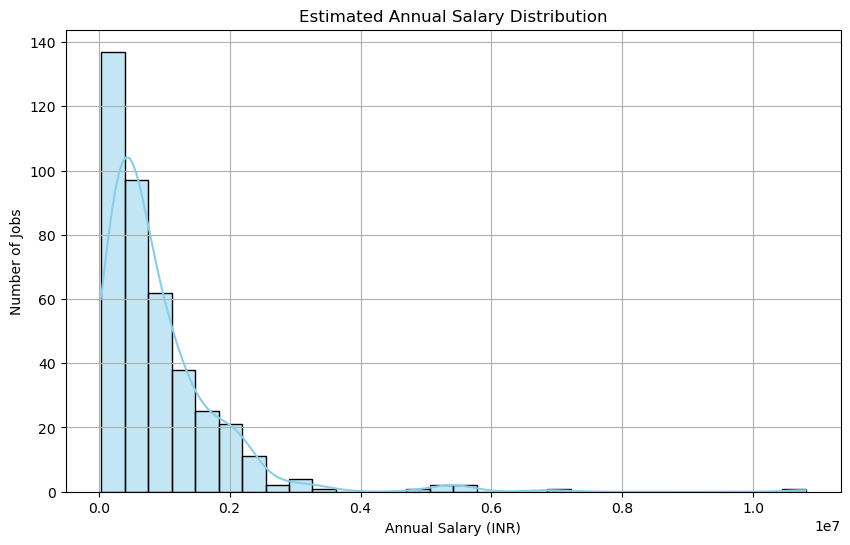

In [8]:
df['estimated_salary'] = df['job_salary'].apply(parse_salary)

df[['job_salary', 'estimated_salary']].dropna().sample(10)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['estimated_salary'].dropna(), bins=30, kde=True, color='skyblue')
plt.title("Estimated Annual Salary Distribution")
plt.xlabel("Annual Salary (INR)")
plt.ylabel("Number of Jobs")
plt.grid(True)
plt.show()


C:\Users\saumi\AppData\Local\Temp\ipykernel_8684\4079042818.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='magma')


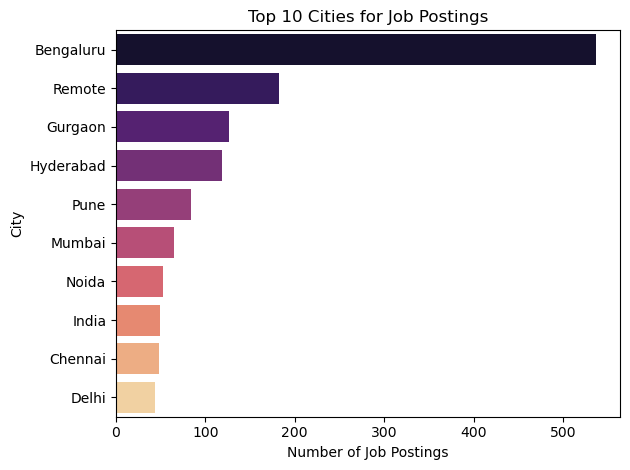

In [13]:
df['job_location'] =   df['job_location'].str.title()
df['job_location'].dropna().unique()[:10]



# %%
df['job_city'] = df['job_location'].str.extract(r'([A-za-z]+)', expand=False)

# %%
df['job_city'].value_counts().head(10)

# %%
import seaborn as sns
import matplotlib.pyplot as plt

top_cities = df['job_city'].value_counts().head(10)
plt.Figure(figsize=(10, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='magma')
plt.title('Top 10 Cities for Job Postings')
plt.xlabel('Number of Job Postings')
plt.ylabel('City')
plt.tight_layout()
plt.show()


C:\Users\saumi\AppData\Local\Temp\ipykernel_8684\352972070.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\saumi\AppData\Local\Temp\ipykernel_8684\352972070.py:42: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\saumi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


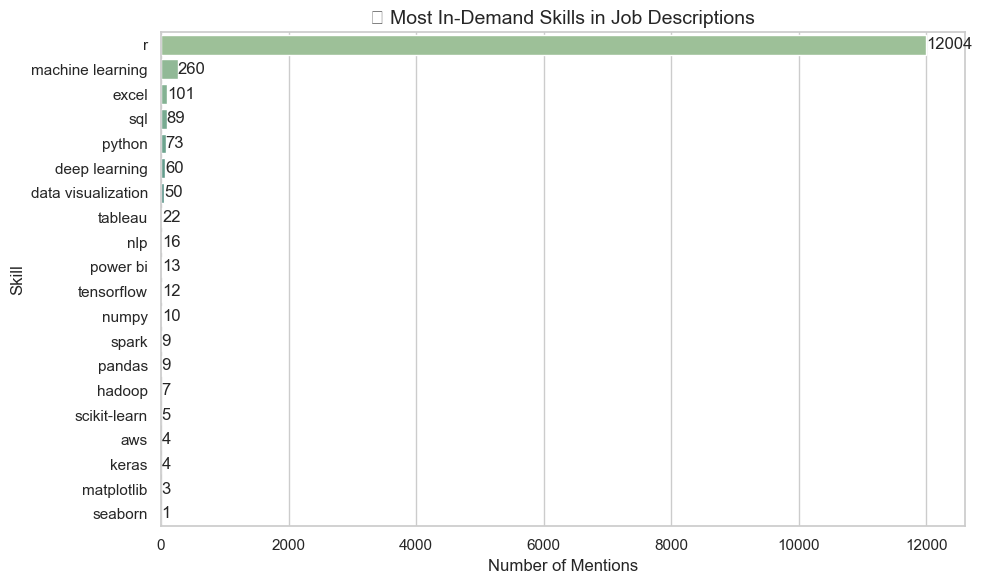

In [14]:
from collections import Counter
import re

all_collections = " ".join(df['job_summary'].dropna().astype(str).values).lower()


skills = ['sql', 'excel', 'python', 'power bi', 'tableau', 'r', 'machine learning', 'aws', 'spark', 'hadoop', 'numpy', 'pandas', 'matplotlib', 'seaborn', 'scikit-learn', 'deep learning', 'tensorflow', 'keras', 'nlp', 'data visualization']

skill_count ={skill : len(re.findall(skill,all_collections))  for skill in skills}
skill_count

skill_df = pd.DataFrame.from_dict(skill_count, orient='index', columns=['count']).sort_values(by='count',ascending=False)


import matplotlib.pyplot as plt
import seaborn as sns

# Set visual theme
sns.set_theme(style="whitegrid")

# Set figure size
plt.figure(figsize=(10,6))

# Plot skill demand as a horizontal bar chart
sns.barplot(
    x='count',
    y=skill_df.index,
    data=skill_df,
    palette='crest'
)
# Display exact values on bars
for index,value in enumerate(skill_df['count']):
    plt.text(value + 1 , index, str(value), va='center')

# Add titles and labels
plt.title('📊 Most In-Demand Skills in Job Descriptions', fontsize=14)
plt.xlabel('Number of Mentions')
plt.ylabel('Skill')



plt.tight_layout()
plt.show()


C:\Users\saumi\AppData\Local\Temp\ipykernel_8684\1534956874.py:21: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\saumi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


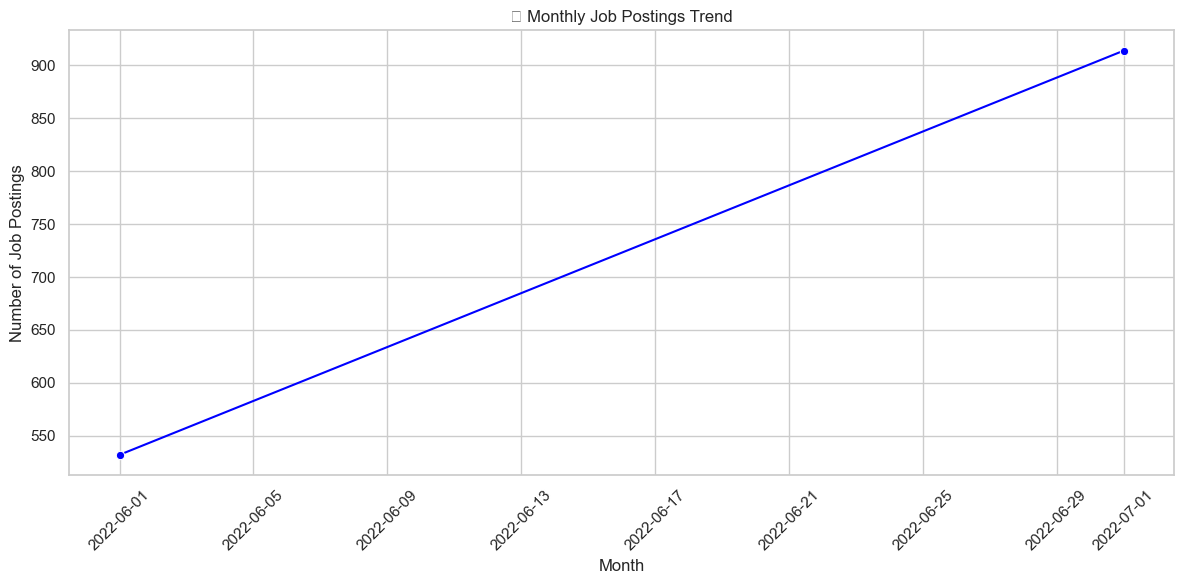

In [15]:
df['post_date_clean'] = pd.to_datetime(df['post_date_clean'], errors='coerce')
df['post_date_clean']

monthly_counts = df.groupby(df['post_date_clean'].dt.to_period('M')).size()


monthly_counts


monthly_counts.index = monthly_counts.index.to_timestamp()
monthly_counts


plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values,marker='o', color='blue')
plt.title('📈 Monthly Job Postings Trend')
plt.xlabel('Month')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np

# %%
df_ml = df[['estimated_salary', 'job_location', 'job_title']].dropna()
x_raw = df_ml[['job_location', 'job_title']]
y = df_ml['estimated_salary']

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

x_encoded = encoder.fit_transform(x_raw)

x_train,x_test,y_train,y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=42)

# %%
model = LinearRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)
print(f"R2 score of the model is :{r2:.2f}")


R2 score of the model is :0.37


In [17]:
for i in range(5):
    print(f" predicted salary :₹{y_pred[i]:,.0f} | actual salary: ₹{y_test.iloc[i]:,.0f} ")


 predicted salary :₹2,047,855 | actual salary: ₹2,047,855 
 predicted salary :₹5,400,000 | actual salary: ₹5,400,000 
 predicted salary :₹798,827 | actual salary: ₹700,000 
 predicted salary :₹2,500,000 | actual salary: ₹1,750,000 
 predicted salary :₹886,485 | actual salary: ₹960,000 
